<a href="https://colab.research.google.com/github/ShreyaSarkar1234/DEEP_LEARNING/blob/main/q1neww.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [ ]:
# Transform to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9.91M/9.91M [00:01<00:00, 8.89MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.39MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.19MB/s]


In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/5, Loss: {loss.item():.4f}")


Epoch 1/5, Loss: 0.1326
Epoch 2/5, Loss: 0.2559
Epoch 3/5, Loss: 0.1295
Epoch 4/5, Loss: 0.0601
Epoch 5/5, Loss: 0.0611


In [ ]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ MLP Test Accuracy: {100 * correct / total:.2f}%")


✅ MLP Test Accuracy: 97.52%


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 28x28 → 14x14
        x = self.pool(F.relu(self.conv2(x)))  # 14x14 → 7x7
        x = x.view(-1, 32*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
cnn_model = CNN().to(device)
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):
    cnn_model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"[CNN] Epoch {epoch+1}/5, Loss: {loss.item():.4f}")


[CNN] Epoch 1/5, Loss: 0.1112
[CNN] Epoch 2/5, Loss: 0.0280
[CNN] Epoch 3/5, Loss: 0.0040
[CNN] Epoch 4/5, Loss: 0.0896
[CNN] Epoch 5/5, Loss: 0.0709


In [ ]:
cnn_model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ CNN Test Accuracy: {100 * correct / total:.2f}%")


✅ CNN Test Accuracy: 98.91%


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate and plot confusion matrix
cm = confusion_matrix(y_true_cnn, y_pred_cnn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: name 'y_true_cnn' is not defined

In [ ]:
# 🔹 9. Plot confusion matrix for CNN
cm = confusion_matrix(y_true_cnn, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: name 'confusion_matrix' is not defined

In [ ]:
# 🔹 10. Plot Training Loss Comparison
plt.plot(mlp_losses, label='MLP Loss')
plt.plot(cnn_losses, label='CNN Loss')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [ ]:
print(type(y_true_cnn), len(y_true_cnn))
print(type(y_pred_cnn), len(y_pred_cnn))


NameError: name 'y_true_cnn' is not defined

In [ ]:
cnn.eval()
y_true_cnn, y_pred_cnn = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true_cnn.extend(labels.cpu().numpy())
        y_pred_cnn.extend(predicted.cpu().numpy())


NameError: name 'cnn' is not defined

In [ ]:
cnn.eval()
y_true_cnn, y_pred_cnn = [], []

print("Starting CNN Evaluation...")

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)

        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)

        y_true_cnn.extend(labels.cpu().numpy())
        y_pred_cnn.extend(predicted.cpu().numpy())

        if i == 0:
            print("✅ First batch processed successfully")
            print("Sample predicted:", predicted[:5].cpu().numpy())
            print("Sample actual:", labels[:5].cpu().numpy())

print("✅ Evaluation Done")
print("Total predictions:", len(y_pred_cnn))
print("Total actual labels:", len(y_true_cnn))


NameError: name 'cnn' is not defined

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 28x28 → 14x14
        x = self.pool(F.relu(self.conv2(x)))  # 14x14 → 7x7
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
cnn = CNN().to(device)


In [ ]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

cnn.train()
for epoch in range(5):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {total_loss / len(train_loader):.4f}")


Epoch 1 loss: 0.2048
Epoch 2 loss: 0.0570
Epoch 3 loss: 0.0399
Epoch 4 loss: 0.0292
Epoch 5 loss: 0.0232


In [ ]:
cnn.eval()
y_true_cnn, y_pred_cnn = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true_cnn.extend(labels.cpu().numpy())
        y_pred_cnn.extend(predicted.cpu().numpy())


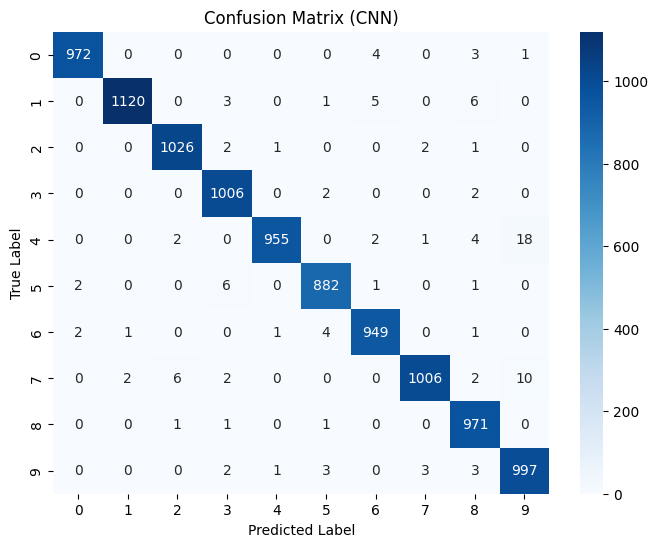

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true_cnn, y_pred_cnn)

# Plot it
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
